In [1]:
import numpy as np
from scipy.interpolate import interp1d
from diffusionpy import D_Matrix,Diffusion_MS_iter,Diffusion_MS,time_dep_surface_cryst,lngi,vpure,dlnai_dlnxi,origin_like,circular,dlnai_dlnxi_loop,Gammaij
import matplotlib.pyplot as plt

In [ ]:
crystallize=np.asarray([False,False,True])
mobile=np.asarray([True,True,True])
mobiles=np.where(mobile)[0]
immobiles=np.where(~mobile)[0]
deltaHSL=np.asarray([31500.])
TSL=np.asarray([429.47])
cpSL=np.asarray([87.44])
DAPI=np.asarray([6.6E-17])
# DAPI=np.asarray([6.6E-21])
# DAPI=np.asarray([6.6E-18])# Bis hier gehts noch
# DAPI=np.asarray([6.6E-17])
sigma=np.asarray([1.98E-02])

# sigma=np.asarray([3.2E-02])
# kt=np.asarray([5.1E-13])
kt=np.asarray([5.1E-12])
g=np.asarray([3.2])
Mi=np.asarray([18.015,65000.,230.26])
rho0i=np.asarray([997.,1180.,1320.])


The experimental data was taken from https://doi.org/10.3390/pharmaceutics15051539

In [ ]:
texp=np.asarray([15,30,45,60,90,120])

## Dl10
relapi10=np.asarray([10.50583658,19.84435798,28.40466926,38.13229572,52.14007782,62.25680934])
relpoly10=np.asarray([8.62745098,19.21568627,28.62745098,36.8627451,49.01960784,60.78431373])

## Dl20
relapi20=np.asarray([5.836575875,6.614785992,13.61867704,19.06614786,27.62645914,36.96498054])
relpoly20=np.asarray([5.098039216,8.235294118,16.07843137,22.74509804,32.94117647,42.74509804])

## Dl30
relapi30=np.asarray([1.945525292,1.945525292,3.112840467,3.891050584,5.447470817,7.003891051])
relpoly30=np.asarray([1.176470588,1.568627451,3.529411765,5.882352941,6.274509804,9.019607843]) 


In [ ]:
nc=3
wv0=0.01
dl0=0.1
wv8=0.99
wv8=0.25
def limits(dl0,wv0,wv8):
       wi0=np.asarray([wv0,(1-wv0)*(1-dl0),(1-wv0)*dl0])
       wi8=np.asarray([wv8,(1-wv8)*(1-dl0),(1-wv8)*dl0])
       return wi0,wi8
T=298.15#+12.5
p=1E5

In [ ]:
kij=D_Matrix(np.asarray([-0.128,0.00648,-0.0574]),nc)
par={"mi":np.asarray([1.20469,2420.99, 8.105152]),
"si": np.asarray([2.797059952,2.947, 2.939]),
"ui" :np.asarray([353.95,205.27, 229.45]),
"eAi" :np.asarray([2425.67,0., 934.2]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 2.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}

In [ ]:
vpures=vpure(p,T,**par)
par["vpure"]=vpures
lngi_fun=lambda wi: lngi(T,wi,**par)
# dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi_loop(T,wi,**par)

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------


------------- Diffusion modeling took 0.833396 seconds ----------------
------------- Initialization and postprocessing took 0.0055659 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 4.035087 seconds ----------------
------------- Initialization and postprocessing took 0.0096795 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.7321361 seconds ----------------
------------- Initialization and postprocessing took 0.0050138 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1695497 seconds ----------------
------------- Initialization and postprocessing took 0.004767 seconds----------------


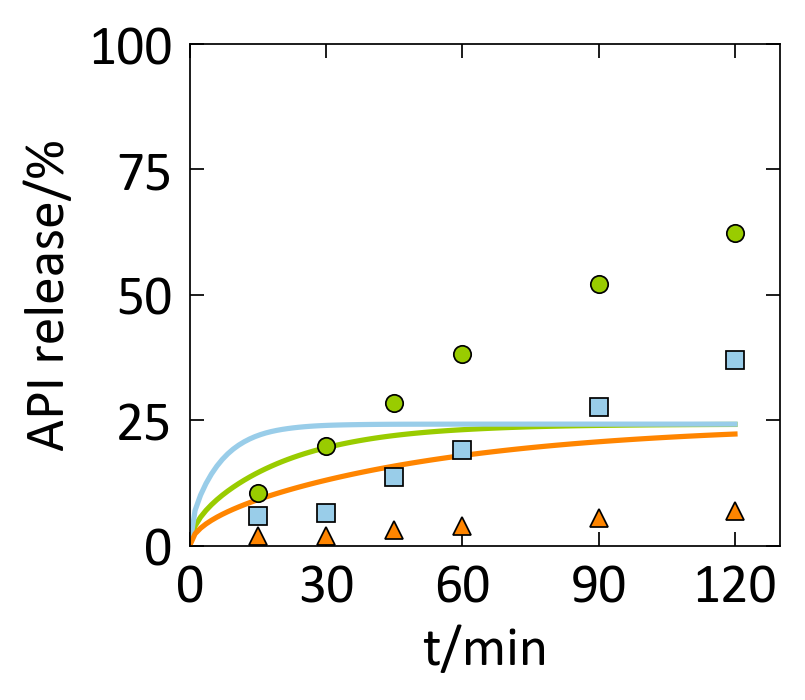

In [ ]:
nt=101
t=np.linspace(0,texp[-1],nt)*60
t=np.linspace(0,texp[-1],nt)*60
# Dvec=np.asarray([1E-16,1E-17,1E-17]) #Ideal
# Dvec=np.asarray([9E-15,9E-15,9E-21]) #Real
#Unterschiedliche erste Diffusionskoeffizienten steuern drugload abhängigkeit
Dvec10=np.asarray([1E-14,1E-17,1E-16])*8000 #Ideal (1-0.1)**1.5=0.8538149682454624
Dvec20=np.asarray([1E-14,1E-17,1E-16])*3000 #      (1-0.2)**1.5=0.7155417527999328
Dvec30=np.asarray([1E-14,1E-17,1E-16])*800  #      (1-0.3)**1.5=0.5856620185738528

#allmbobile
Dvec10=np.asarray([1E-16,1E-16,1E-17])*10000/3 #Ideal (1-0.1)**1.5=0.8538149682454624
Dvec20=np.asarray([1E-16,1E-16,1E-17])*3000/3 #      (1-0.2)**1.5=0.7155417527999328
Dvec30=np.asarray([1E-16,1E-16,1E-17])*400/3  #      (1-0.3)**1.5=0.5856620185738528
# Dvec=np.asarray([1E-10,5E-13,1E-11])/2 #real
# Dvec=np.asarray([1E-12,5E-13,5E-15]) #real

#Sorption
Dvec10=np.asarray([1E-16,1E-16,1E-17])*100000/3 #Ideal (1-0.1)**1.5=0.8538149682454624
Dvec20=np.asarray([1E-16,1E-16,1E-17])*300000/3 #      (1-0.2)**1.5=0.7155417527999328
Dvec30=np.asarray([1E-16,1E-16,1E-17])*40000/3  #      (1-0.3)**1.5=0.5856620185738528
L=10E-5

def iterate(wi0,wi8,Dvec):
       # Dvec=np.asarray([1E-14,1E-17,1E-16])*10000
       # dlnai_dlnwi=np.stack([dlnai_dlnwi_fun(wi8*0.5+wi0*0.5)]*nt)
       wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,full_output=True,nz=40)
       # wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,full_output=True,dlnai_dlnwi_fun=dlnai_dlnwi_fun)
       for i in range(2):
              lngi_tz=np.asarray([[lngi_fun(np.ascontiguousarray(col)) for col in row.T] for row in wtz])
              # dlnai_dlnwi=np.asarray([[dlnai_dlnwi_fun(col) for col in row.T] for row in (wtz[:,:,:1]+wtz[:,:,:-1])/2])
              # wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,full_output=True)
              wt,wtz,zvec,Lt,alpha,r=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,deltaHSL=deltaHSL,TSL=TSL,cpSL=cpSL,crystallize=crystallize,sigma=sigma,DAPI=DAPI,kt=kt,g=g,full_output=True,lngi_tz=lngi_tz,nz=40)
              # wt,wtz,zvec,Lt,alpha,r=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,dlnai_dlnwi=dlnai_dlnwi,deltaHSL=deltaHSL,TSL=TSL,cpSL=cpSL,crystallize=crystallize,sigma=sigma,DAPI=DAPI,kt=kt,g=g,full_output=True,lngi_tz=lngi_tz)
              # wt,_,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,np.asarray([True,True,True]),full_output=True,nz=40)
              notreleased=wt/wi0
              # alpha=np.zeros_like(wt[:,0])
              # r=alpha
              release=(1-notreleased)
       return release,alpha,r,wtz[:,0,:]

dl010=0.1
dl020=0.2
dl030=0.7

wi010,wi810=limits(dl010,wv0,wv8)
wi020,wi820=limits(dl020,wv0,wv8)
wi030,wi830=limits(dl030,wv0,wv8)

release10,alpha10,_,wasser10=iterate(wi010,wi810,Dvec10)
release20,alpha20,_,wasser20=iterate(wi020,wi820,Dvec20)
release30,alpha30,_,wasser30=iterate(wi030,wi830,Dvec30)


# alpha10=np.fmin(alpha10,dl010)
# alpha20=np.fmin(alpha20,dl020)
# alpha30=np.fmin(alpha30,dl030)


fig,ax=origin_like.subplots()
ax.set_axisbelow(True)
origin_like.plot(ax,t/60,release10[:,2]*100,"g-")
origin_like.plot(ax,t/60,release20[:,2]*100,"c-")
origin_like.plot(ax,t/60,release30[:,2]*100,"-r")

origin_like.plot(ax,texp,relapi10,"go")
origin_like.plot(ax,texp,relapi20,"cs")
origin_like.plot(ax,texp,relapi30,"^r")

ax.set_xlabel("t/min")
ax.set_ylabel("API release/%")
origin_like.set_ticks(ax,0,120,0,100)
plt.ylim(0,100)
plt.xlim(0,130)


plt.show()
# import pandas as pd
# pd.DataFrame((tmin,ww)).T.to_clipboard(excel=True, sep=None, index=False, header=None)




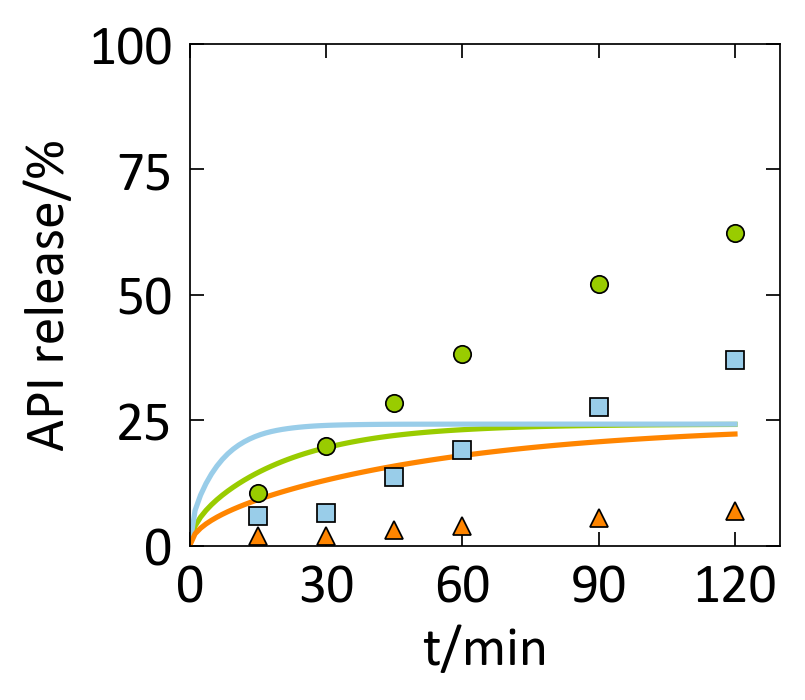

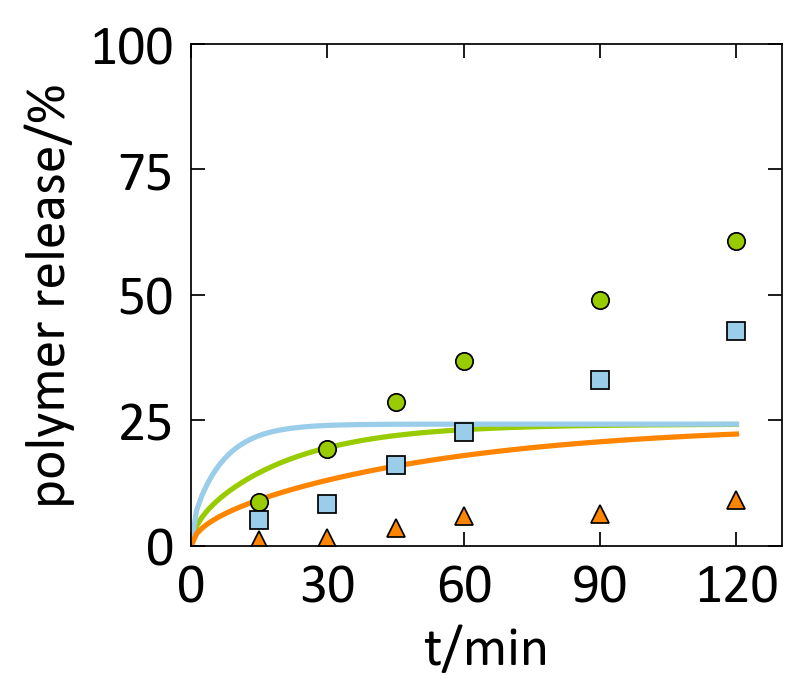

In [ ]:
fig,ax=origin_like.subplots()
ax.set_axisbelow(True)
origin_like.plot(ax,t/60,release10[:,2]*100,"g-")
origin_like.plot(ax,t/60,release20[:,2]*100,"c-")
origin_like.plot(ax,t/60,release30[:,2]*100,"-r")

origin_like.plot(ax,texp,relapi10,"go")
origin_like.plot(ax,texp,relapi20,"cs")
origin_like.plot(ax,texp,relapi30,"^r")

ax.set_xlabel("t/min")
ax.set_ylabel("API release/%")
origin_like.set_ticks(ax,0,120,0,100)
plt.ylim(0,100)
plt.xlim(0,130)



fig5,ax5=origin_like.subplots()
ax5.set_axisbelow(True)
origin_like.plot(ax5,t/60,release10[:,1]*100,"g-")
origin_like.plot(ax5,t/60,release20[:,1]*100,"c-")
origin_like.plot(ax5,t/60,release30[:,1]*100,"-r")

origin_like.plot(ax5,texp,relpoly10,"go")
origin_like.plot(ax5,texp,relpoly20,"cs")
origin_like.plot(ax5,texp,relpoly30,"^r")

ax5.set_xlabel("t/min")
ax5.set_ylabel("polymer release/%")
origin_like.set_ticks(ax5,0,120,0,100)
plt.ylim(0,100)
plt.xlim(0,130)


plt.show()

(<Figure size 1750x1250 with 7 Axes>,
 array([<PolarAxes: title={'center': '10.00 min'}>,
        <PolarAxes: title={'center': '20.00 min'}>,
        <PolarAxes: title={'center': '30.00 min'}>,
        <PolarAxes: title={'center': '40.00 min'}>,
        <PolarAxes: title={'center': '50.00 min'}>,
        <PolarAxes: title={'center': '60.00 min'}>], dtype=object))

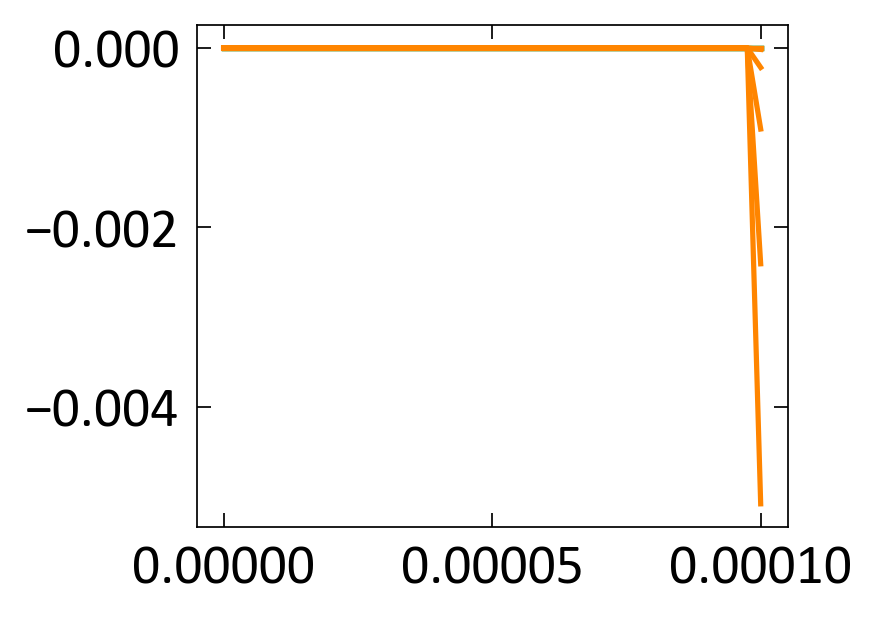

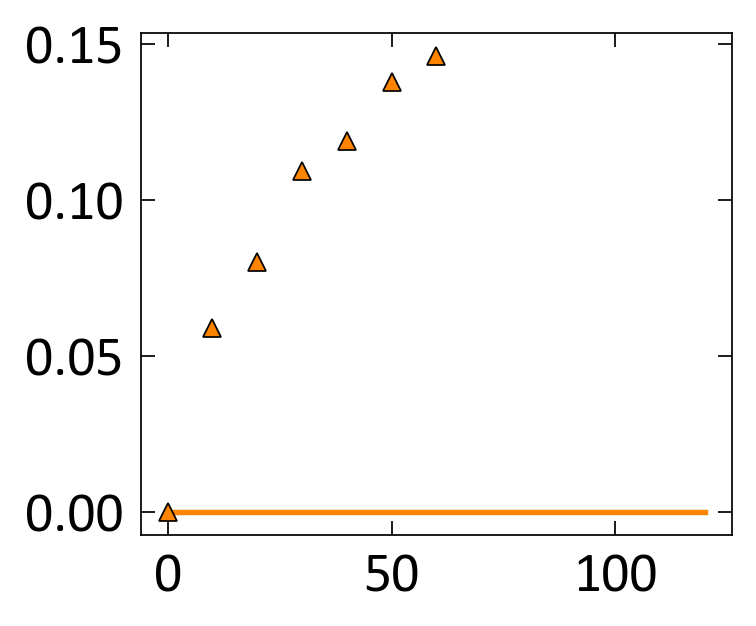

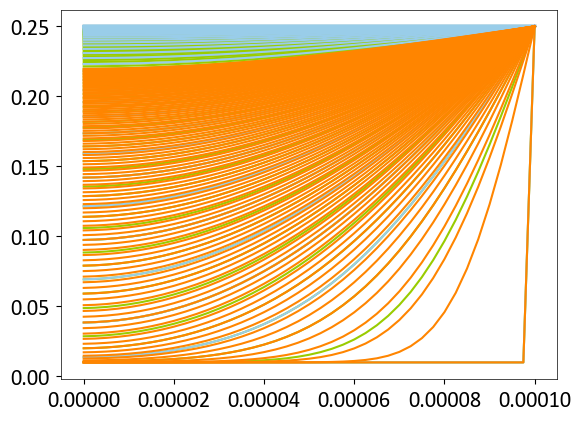

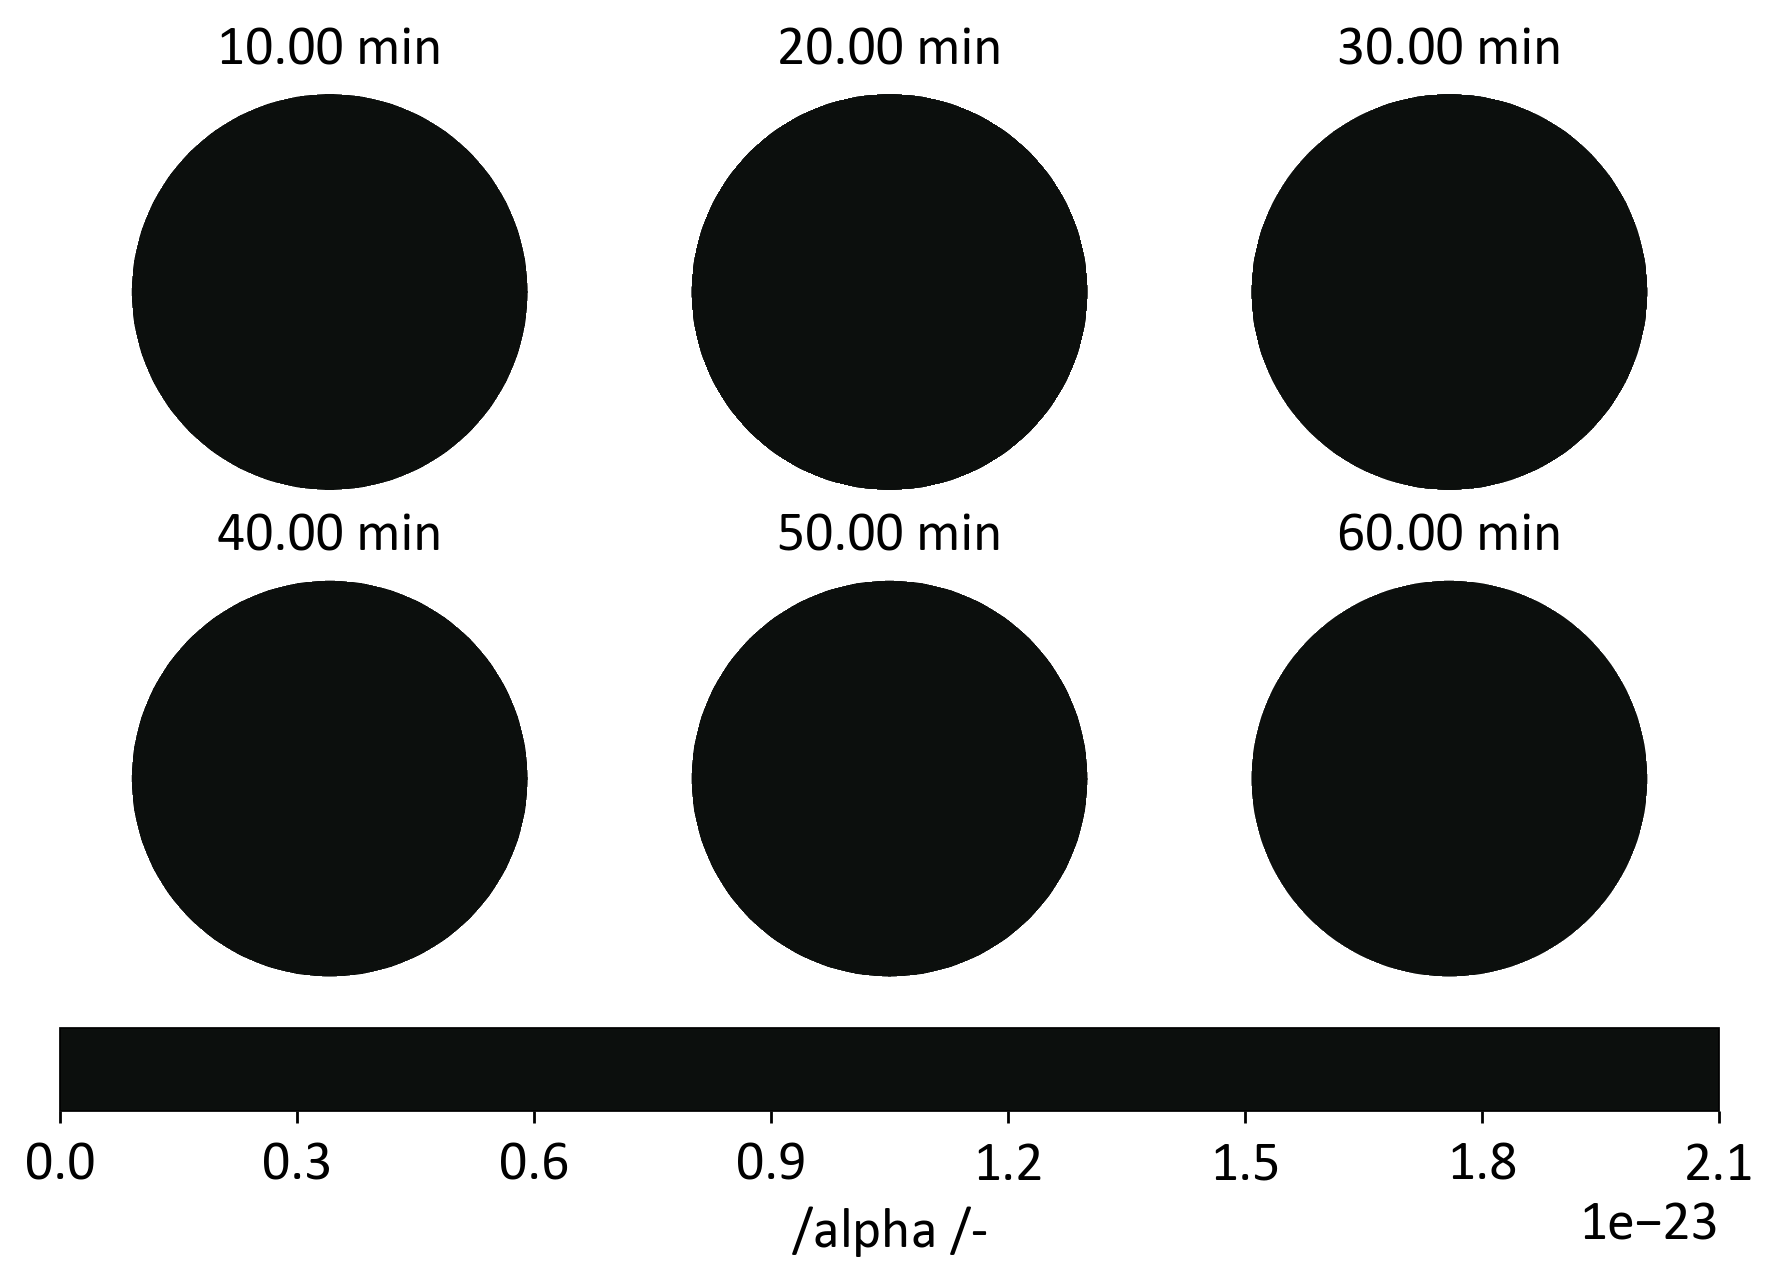

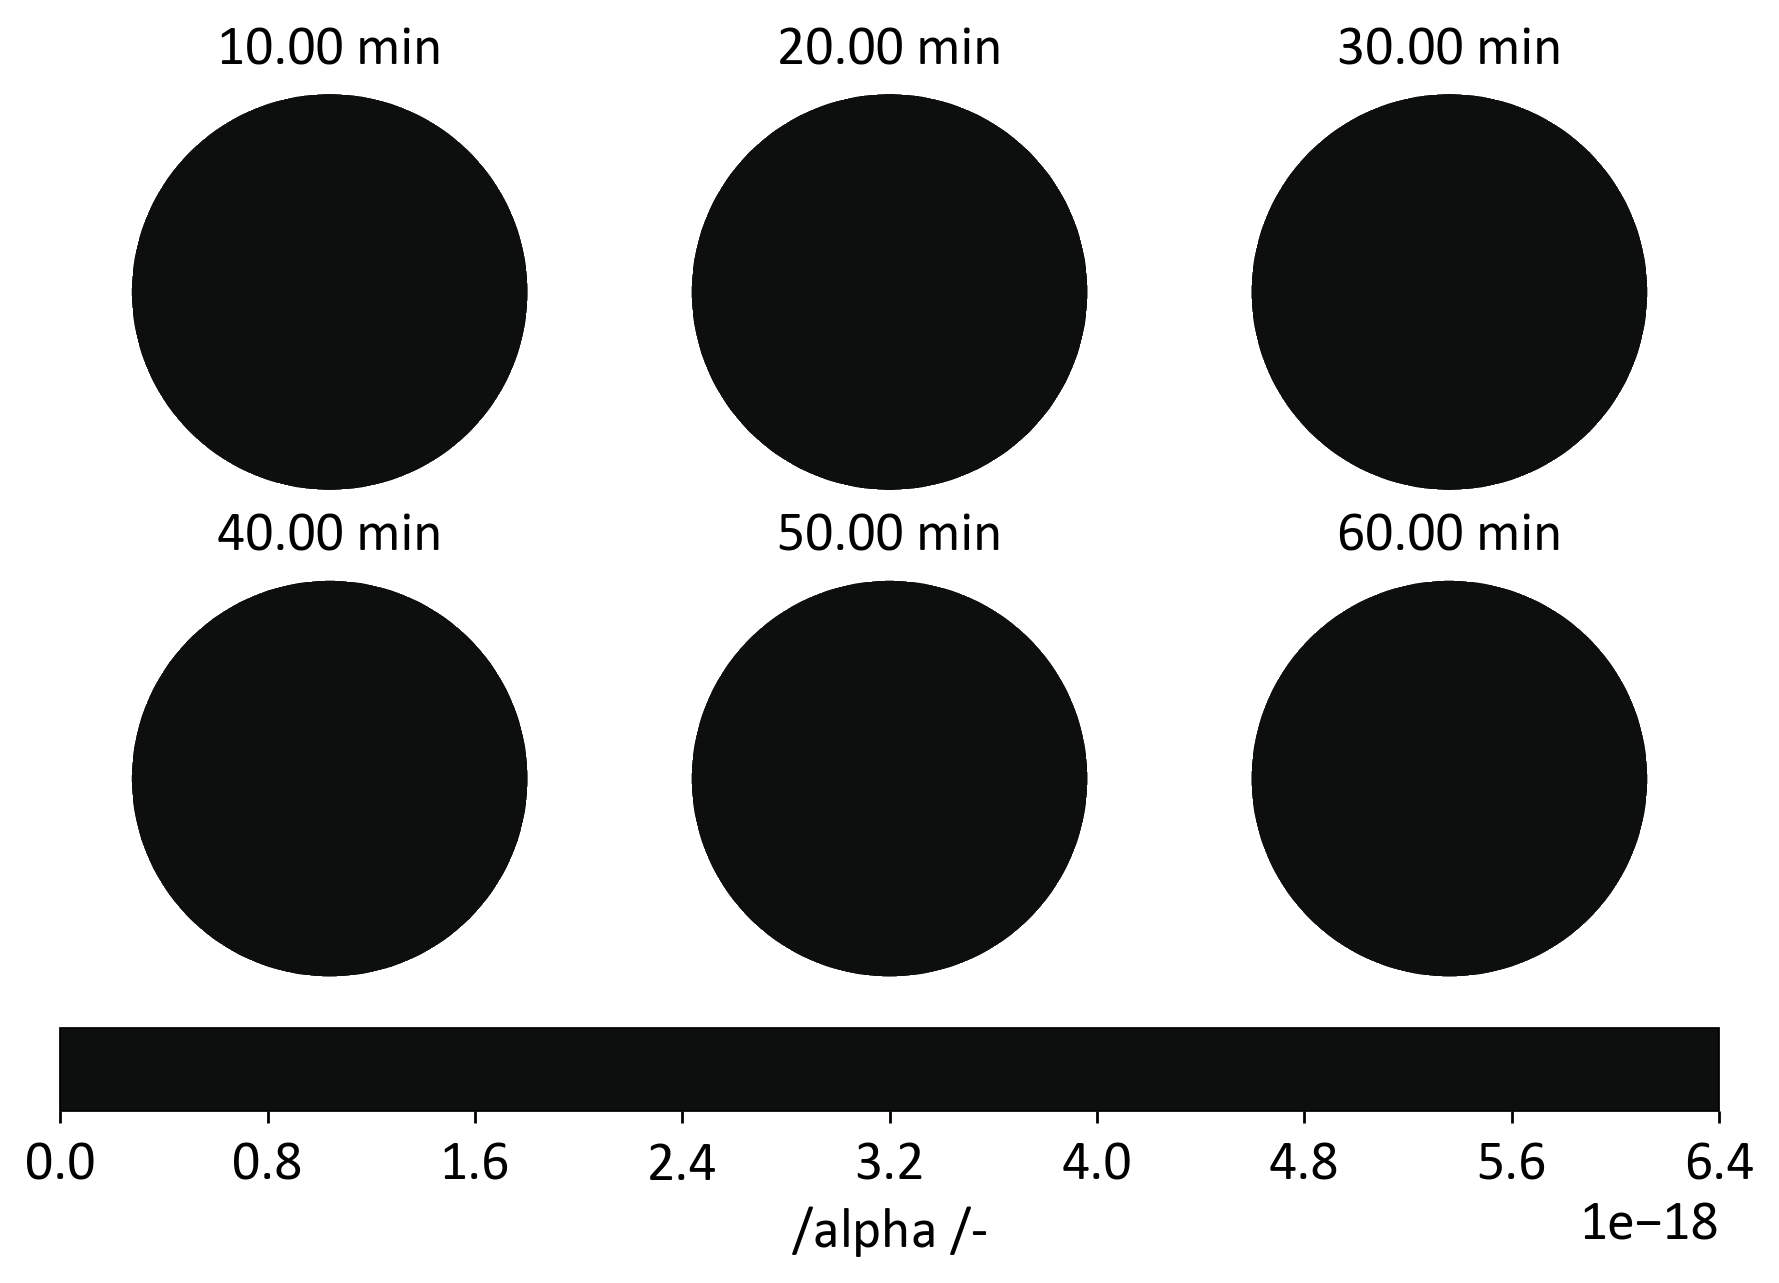

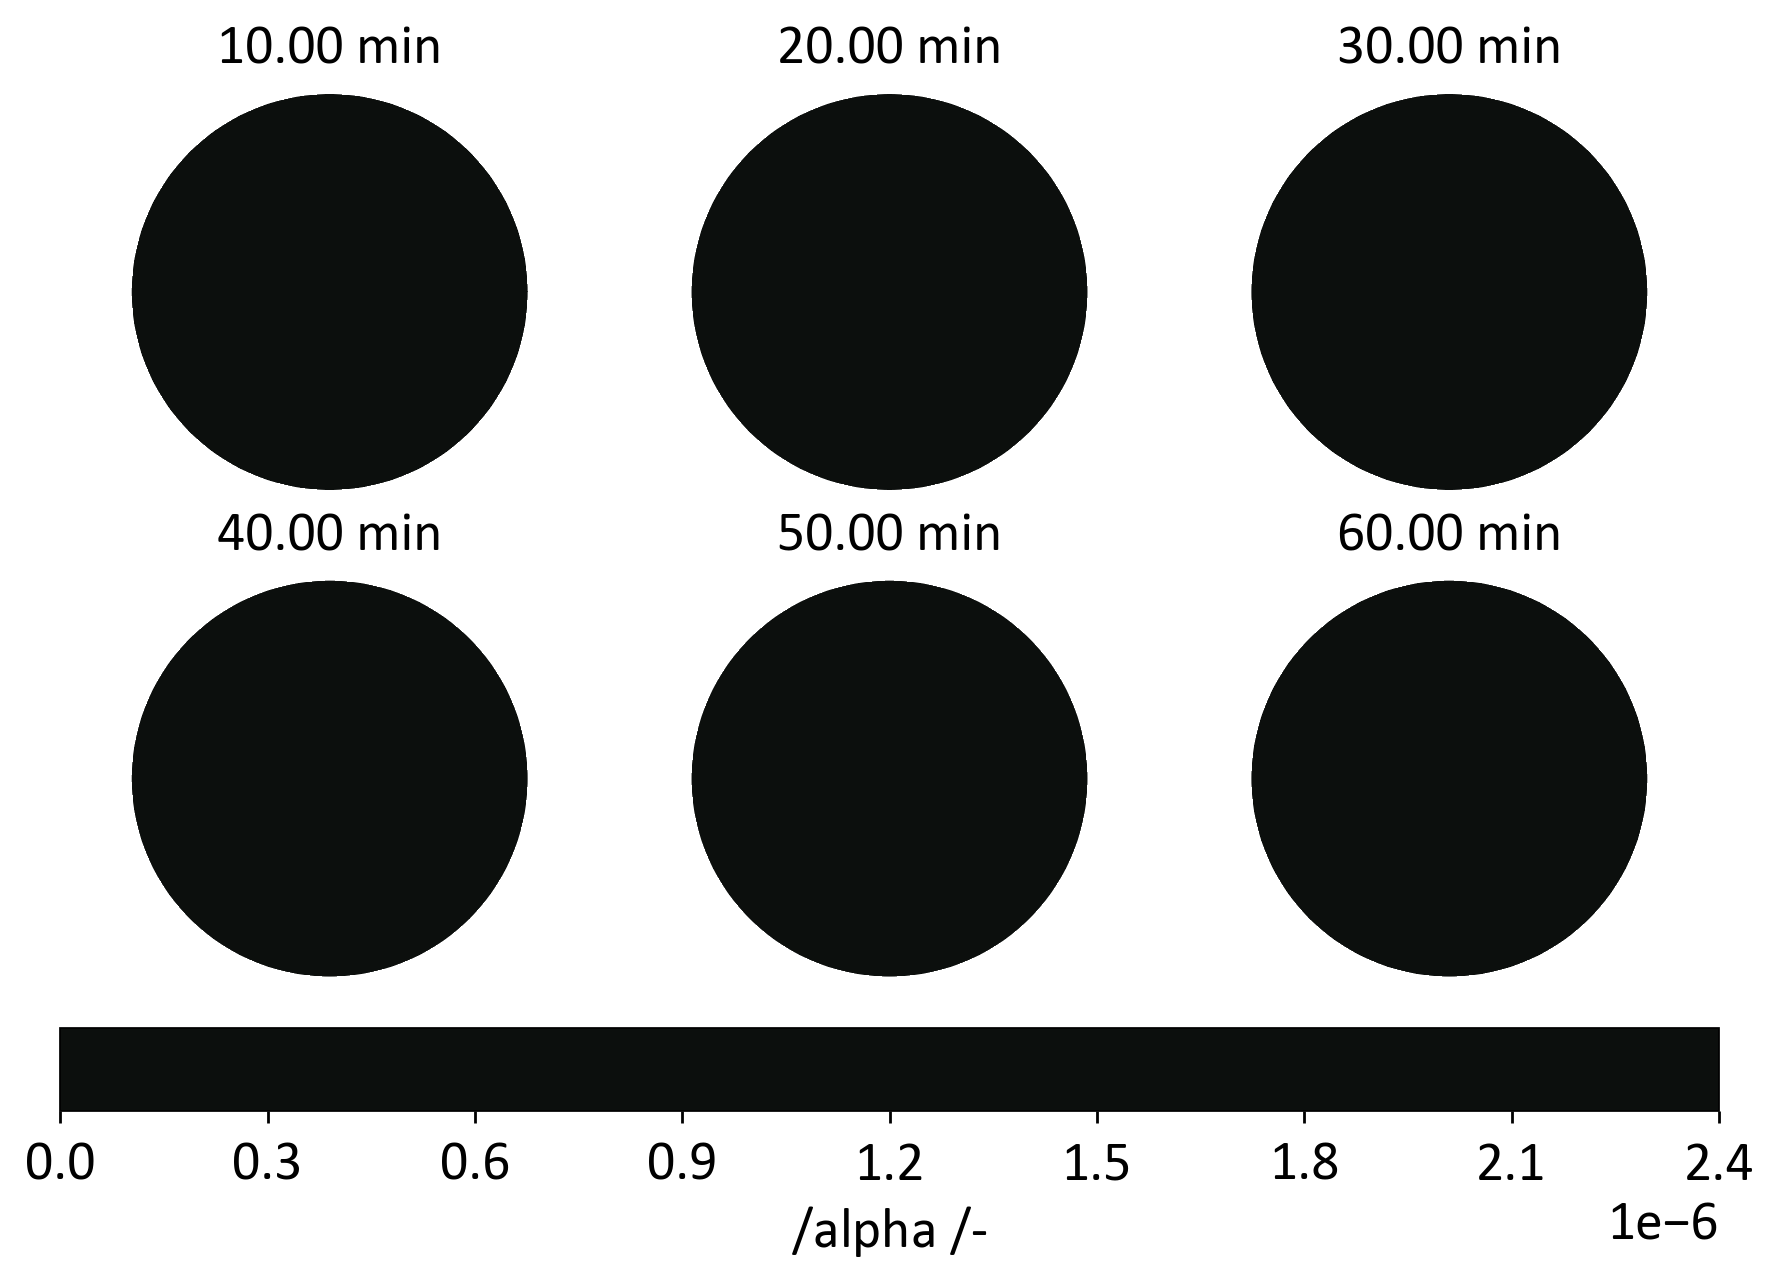

In [ ]:
from diffusionpy import circular
fig1,ax1=origin_like.subplots()
zvec=np.linspace(0,L,alpha10.shape[0])
origin_like.plot(ax1,zvec,alpha10[:,::10][:,:-5],"g-")
origin_like.plot(ax1,zvec,alpha20[:,::10][:,:-5],"c-")
origin_like.plot(ax1,zvec,alpha30[:,::10][:,:-5],"-r")


from matplotlib.colors import LinearSegmentedColormap


colors = [(12/255, 15/255, 13/255), (196/255, 212/255, 209/255)] # first color is black, last is red
# colors = [(12/255, 15/255, 13/255), (177/255, 188/255, 166/255)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

tinterp=np.asarray([10,20,30,40,50,60])*60

front10,front20,front30=[],[],[]
for i in range(nt):
        try:
                front10.append(1-zvec[np.where(alpha10[:,i]>dl010/4)[0][0]]/L)
        except:
                front10.append(0)
        try:
                front20.append(1-zvec[np.where(alpha20[:,i]>dl020/4)[0][0]]/L)
        except:
                front20.append(0)
        try:
                front30.append(1-zvec[np.where(alpha30[:,i]>dl030/4)[0][0]]/L)
        except:
                front30.append(0)

front10,front20,front30=np.asarray(front10),np.asarray(front20),np.asarray(front30)

figg,axx=origin_like.subplots()
origin_like.plot(axx,t/60,front10,"g-")
origin_like.plot(axx,t/60,front20,"c-")
origin_like.plot(axx,t/60,front30,"-r")
figgg,axxx=plt.subplots()
origin_like.plot(axxx,zvec,wasser10.T,"g-")
origin_like.plot(axxx,zvec,wasser20.T,"c-")
origin_like.plot(axxx,zvec,wasser30.T,"-r")

texp2=np.asarray([0,10,20,30,40,50,60])
front30exp=np.asarray([0,0.058947368,0.08,0.109473684,0.118947368,0.137894737,0.146315789])


# origin_like.plot(ax,texp2,front10exp,"go")
# origin_like.plot(ax,texp2,front20exp,"cs")
origin_like.plot(axx,texp2,front30exp,"^r")

circular(t,zvec,np.fmax(alpha10.T[:,None,:],0),cmap=cm,vmin=0,vmax=1,label="$/alpha$ /-",tinterp=tinterp)
circular(t,zvec,np.fmax(alpha20.T[:,None,:],0),cmap=cm,vmin=0,vmax=1,label="$/alpha$ /-",tinterp=tinterp)
circular(t,zvec,np.fmax(alpha30.T[:,None,:],0),cmap=cm,vmin=0,vmax=1,label="$/alpha$ /-",tinterp=tinterp)